In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train_path = 'speech-based-classification-layer-9/train.csv'
valid_path = 'speech-based-classification-layer-9/valid.csv'
test_path = 'speech-based-classification-layer-9/test.csv'
train = pd.read_csv(train_path)
valid = pd.read_csv(valid_path)
test = pd.read_csv(test_path)
original_train = train.copy()
original_valid = train.copy()
original_test = test.copy()

# Mean Imputing

In [3]:
train.isnull().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

In [4]:
mean_age = int(train['label_2'].mean())
train['label_2'].fillna(mean_age, inplace=True)
train['label_2'] = train['label_2'].astype(int)
train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,27,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,27,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,27,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,27,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,27,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.041520,0.302638,0.004811,0.211441,-0.249326,-0.113395,-0.146776,-0.146222,-0.040344,-0.124016,...,0.290069,-0.223051,-0.053575,-0.230222,-0.451943,0.117817,39,29,1,6
28516,-0.056359,0.061850,0.051865,0.032107,-0.005930,-0.040313,0.117453,-0.067553,0.045004,0.035735,...,0.004518,0.035248,-0.047345,-0.006539,-0.025633,0.002474,39,29,1,6
28517,0.019361,0.148111,0.093434,0.011795,-0.074029,-0.077628,0.049933,-0.096354,0.138556,0.130414,...,0.014918,0.015676,-0.033608,0.068212,0.049871,-0.027607,39,29,1,6
28518,-0.043644,0.084073,0.074749,0.091776,-0.090782,-0.163187,-0.012568,-0.051021,0.038726,0.011009,...,-0.098420,0.113067,0.028218,0.036682,0.030056,-0.084346,39,29,1,6


In [5]:
valid.isnull().sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_768     0
label_1         0
label_2        14
label_3         0
label_4         0
Length: 772, dtype: int64

In [6]:
mean_age = int(train['label_2'].mean())
valid['label_2'].fillna(mean_age, inplace=True)
valid['label_2'] = valid['label_2'].astype(int)
valid

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.130454,0.103857,0.130866,-0.036366,-0.152212,-0.072316,-0.041838,-0.019596,0.038727,0.022496,...,0.129246,0.018913,0.013387,-0.054259,0.006282,0.049646,45,27,1,6
1,0.019179,0.104888,0.079487,0.005187,-0.134111,-0.109271,0.054558,-0.083966,-0.000091,0.083015,...,-0.031823,0.061069,0.036411,0.101357,0.088504,0.008192,45,27,1,6
2,-0.028485,0.051889,0.033343,-0.029115,-0.091265,-0.038653,0.113460,-0.057983,0.128808,0.062455,...,-0.033106,-0.007366,-0.027673,0.052090,0.044097,0.054422,45,27,1,6
3,-0.078959,0.082325,0.068852,-0.028885,-0.146059,-0.071453,-0.028955,0.031253,0.034923,0.019338,...,0.164456,-0.025891,0.037993,0.012060,-0.044266,0.045405,45,27,1,6
4,0.001748,0.050968,-0.034524,0.074153,0.063857,-0.133338,0.102604,-0.031676,0.010629,-0.018684,...,-0.102749,0.022433,0.018421,0.086064,0.075351,-0.067089,45,27,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-0.015146,0.075347,-0.067940,0.018324,-0.009130,-0.078199,0.019046,0.054832,0.057062,-0.041307,...,-0.037656,0.014558,-0.006257,0.114661,-0.020831,0.043870,39,29,1,6
746,-0.093367,0.090779,-0.014720,0.060278,-0.054997,0.012507,0.138347,0.064434,0.021669,0.038423,...,-0.102469,-0.012509,-0.024472,-0.082420,-0.018768,-0.091912,39,29,1,6
747,0.036313,0.053569,-0.040507,0.084671,-0.047545,-0.127989,0.048077,0.038251,0.058703,0.012898,...,-0.139285,-0.020544,-0.086482,0.202496,-0.089369,-0.052960,39,29,1,6
748,0.002803,0.127188,0.091111,-0.024576,-0.044046,-0.065907,-0.019063,-0.062951,0.066077,0.058489,...,0.055279,-0.014534,0.014749,0.017866,-0.008768,-0.017424,39,29,1,6


In [8]:
valid.isnull().sum()

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_768    0
label_1        0
label_2        0
label_3        0
label_4        0
Length: 772, dtype: int64

# Label 2 Data

In [9]:
train_features = train.iloc[:, :768]
train_label_2 = train.iloc[:, 769]

valid_features = valid.iloc[:, :768]
valid_label_2 = valid.iloc[:, 769]

test_features = test.iloc[:, 1:]

## Class Distribution Plot

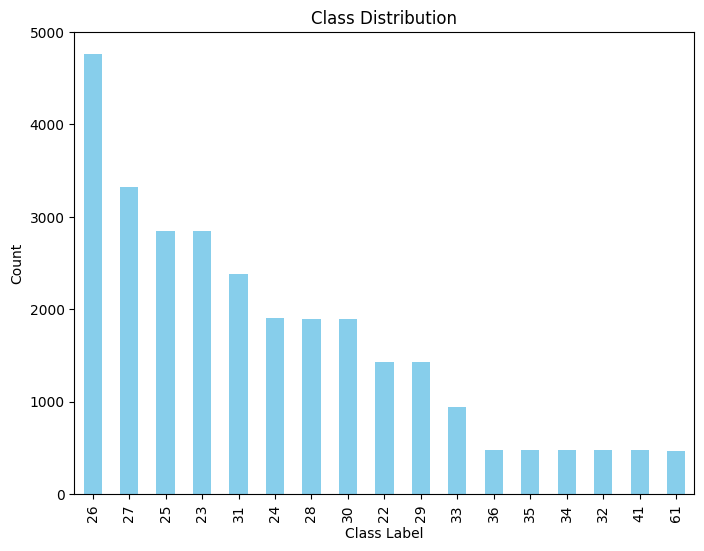

In [10]:
class_counts = train_label_2.value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')


plt.show()

Choosing the best model from random forest model and svc model

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}


best_model = None
best_accuracy = 0.0


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)

for name, clf in classifiers.items():
    total_accuracy = 0.0

    for train_index, test_index in skf.split(train_features, train_label_2):
        X_train, X_test = train_features.iloc[train_index], train_features.iloc[test_index]
        y_train, y_test = train_label_2[train_index], train_label_2[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy

    average_accuracy = total_accuracy / n_splits
    print(f"{name} - Average Accuracy: {average_accuracy}")


    if average_accuracy > best_accuracy:
        best_model = clf
        best_accuracy = average_accuracy

print(f"Best Model: {type(best_model)._name_}")

Feature scaling

In [18]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
scaled_train_features = transformer.fit_transform(train_features)
scaled_valid_features = transformer.fit_transform(valid_features)
scaled_test_features = transformer.fit_transform(test_features)

SMOTE For class imbalance

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42 )
train_feature_resampled, train_label_3_resampled = smote.fit_resample(scaled_train_features, train_label_2)

PCA Decomposition

In [20]:
from sklearn.decomposition import PCA

def performPca(train_input, valid_input,test_input, n_components):
    pca = PCA(n_components=n_components)
    train_reduced = pca.fit_transform(train_input)
    valid_reduced = pca.transform(valid_input)
    test_reduced = pca.transform(test_input)
    train_reduced_df = pd.DataFrame(train_reduced, columns=[f"new_feature_{i+1}" for i in range(train_reduced.shape[1])])
    valid_reduced_df = pd.DataFrame(valid_reduced, columns=[f"new_feature_{i+1}" for i in range(valid_reduced.shape[1])])
    test_reduced_df = pd.DataFrame(test_reduced, columns=[f"new_feature_{i+1}" for i in range(test_reduced.shape[1])])


    return train_reduced_df, valid_reduced_df,test_reduced_df

In [21]:
train_reduced_df, valid_reduced_df,test_reduced_df = performPca(train_feature_resampled, scaled_valid_features, scaled_test_features, 0.99)

In [22]:
from sklearn.svm import SVC

model = SVC()
model.fit(train_reduced_df, train_label_3_resampled)
y_pred = model.predict(valid_reduced_df)
accuracy = accuracy_score(valid_label_2, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.936


In [23]:
# 0.912
test_pred = model.predict(test_reduced_df)

In [24]:
#Write to file
test_pred_df = pd.DataFrame(test_pred, columns=['label_2'])
test_pred_df.to_csv('predictions/label_2.csv', index=False)

## Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf' , 'linear', 'poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3 , cv=3)
  
# fitting the model for grid search
grid.fit(train_reduced_df, train_label_2)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.167 total time= 9.0min
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.167 total time=12.5min
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.167 total time=13.9min
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.300 total time= 2.5min
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.425 total time= 2.7min
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.306 total time= 2.6min
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.318 total time= 5.5min
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.489 total time= 5.9min
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.326 total time= 5.5min
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.167 total time= 8.1min
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.167 total time= 6.8min
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;

In [27]:
from sklearn.svm import SVC

fin_model = SVC(C= 0.1, gamma = 1, kernel = 'linear')
fin_model.fit(train_reduced_df, train_label_3_resampled)
fin_y_pred = fin_model.predict(valid_reduced_df)
accuracy = accuracy_score(valid_label_2, fin_y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.804


In [ ]:
fin_test_pred = fin_model.predict(test_reduced_df)

In [ ]:
#Write to file
fin_test_pred_df = pd.DataFrame(fin_test_pred, columns=['label_1'])
fin_test_pred_df.to_csv('predictions/label_1.csv', index=False)